In [2]:
import pandas as pd
import numpy as np

import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn
warnings.simplefilter('ignore')

import matplotlib.pyplot as plt
import seaborn as sns

from pylab import *
mpl.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

% matplotlib inline

from wordcloud import WordCloud
import jieba
from jieba import analyse
import re

data = pd.read_excel('../data/2015-2018维修数据_部分.xlsx')

def text_clean(content):
    try:
        result = re.sub(r'[^\u4e00-\u9fa5,A-Za-z0-9]', " ",content)
        result = re.sub('br', " ",result)
        result = re.sub('nbsp', " ",result)
        result = re.sub('正常', " ",result)
    except:
        result = ''

    return result

data['word_clean1'] = data['服务报告'].apply(lambda x: text_clean(x))
data['word_clean2'] = data['问题描述'].apply(lambda x: text_clean(x))

def word_cloud_tfidf(data_line, output):

    cache = ""

    for i in data_line:
        cache = cache + i
    content = " ".join(jieba.cut(cache))

    key_words = analyse.extract_tags(content, topK=2000, withWeight=True, allowPOS=('nb','n','nr', 'ns','a','ad','an','nt','nz','v','d'))
    textrank = analyse.textrank(content,topK = 200,withWeight = True)

    keywords = dict()
    for i in key_words:
        keywords[i[0]] = i[1]
        
#     back_coloring = plt.imread(bg_image_path)  # 设置背景图片

    my_wordcloud = WordCloud(
                     background_color = 'white', #背景颜色
                     width=1500,height=960, #图片大小
                     margin=10
                   )
    my_wordcloud.generate_from_frequencies(keywords)

    plt.figure(figsize = (12, 7))
    plt.imshow(my_wordcloud)
    plt.axis("off")
    plt.savefig('./word_cloud(问题描述)/' + output + '.png')

def word_cloud(data_line):

    text = " "

    for i in data_line:
        text = text + i

    wordlist_after_jieba = jieba.cut(text, cut_all = True)
    wl_space_split = " ".join(wordlist_after_jieba)

    my_wordcloud = WordCloud().generate(wl_space_split)
    plt.figure(figsize = (12, 7))
    plt.imshow(my_wordcloud)
    plt.axis("off")
    plt.show()

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\KENSHI~1\AppData\Local\Temp\jieba.cache


康迈


Loading model cost 0.715 seconds.
Prefix dict has been built succesfully.


吴挺
戴明路
潘盛
杨露鉴
林栋
王剑
徐睿超
文立强
傅菲菲
宋挺
徐琪枫
陈凌云
肖无双
林玉军
数据量太少...
林正一
王强2
黄玉立
王新震
赵佳盛
郑耀庭
刘文久
数据量太少...


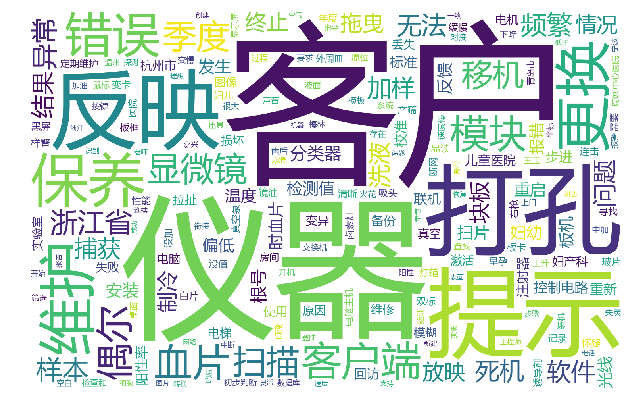

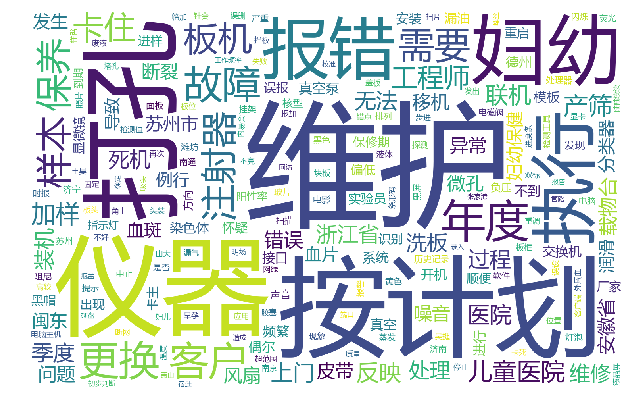

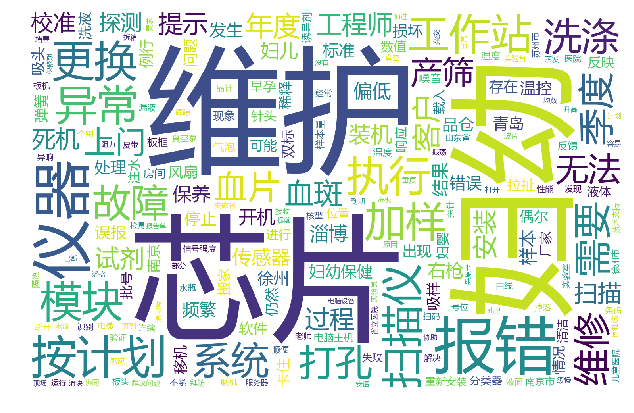

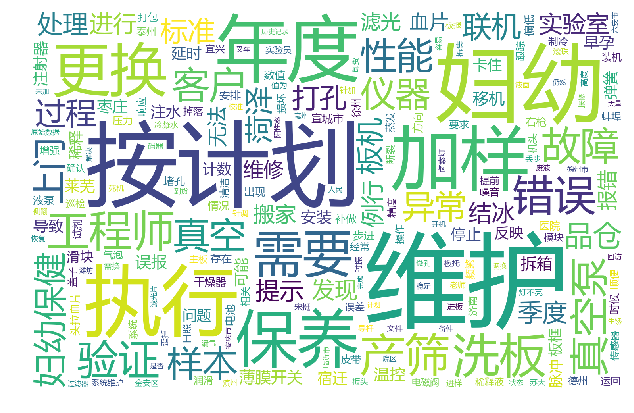

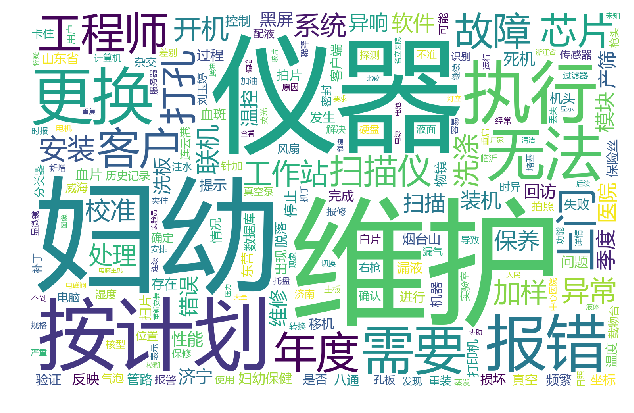

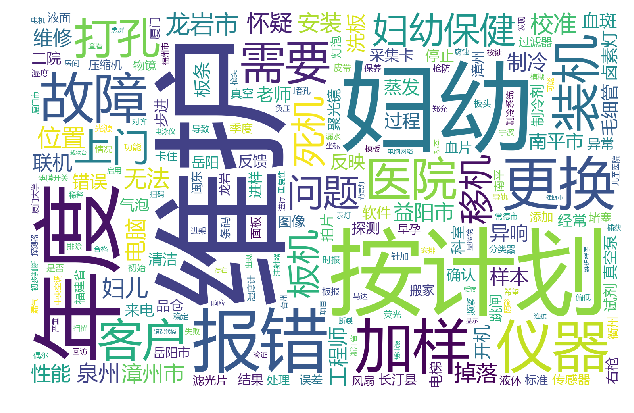

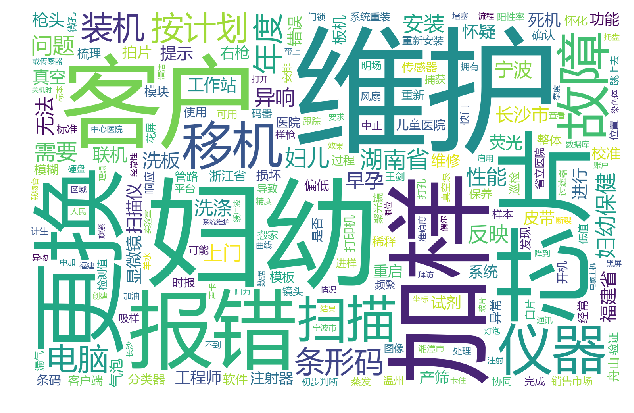

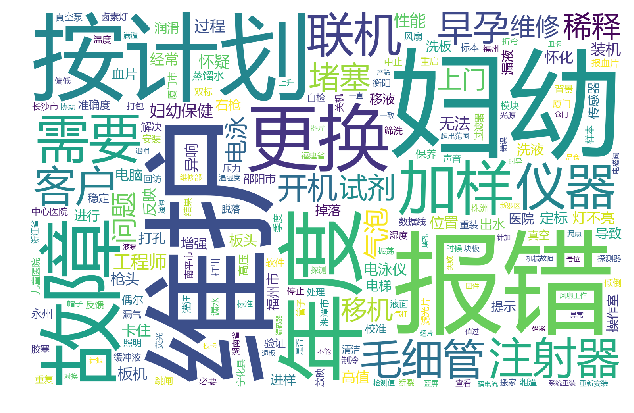

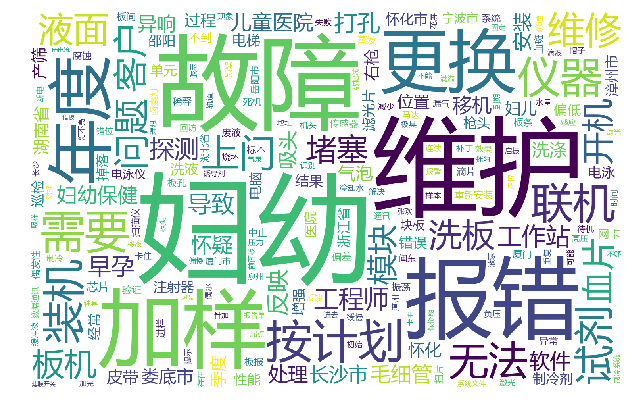

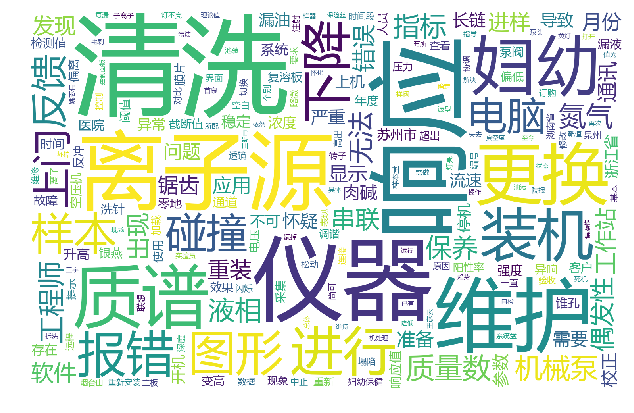

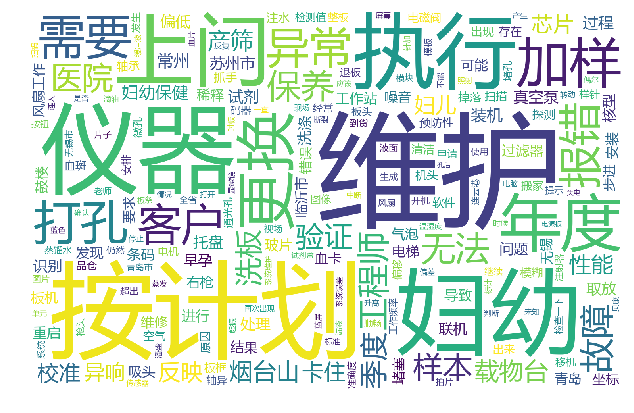

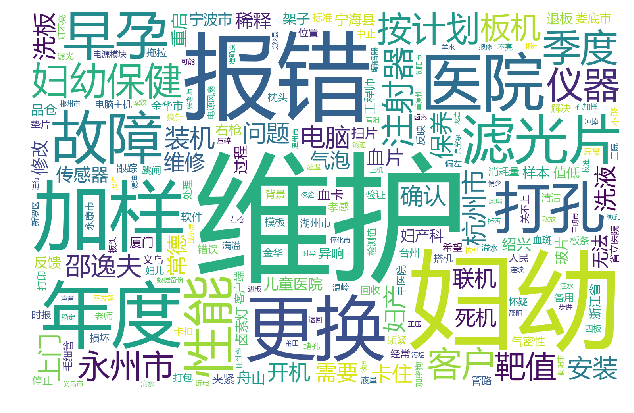

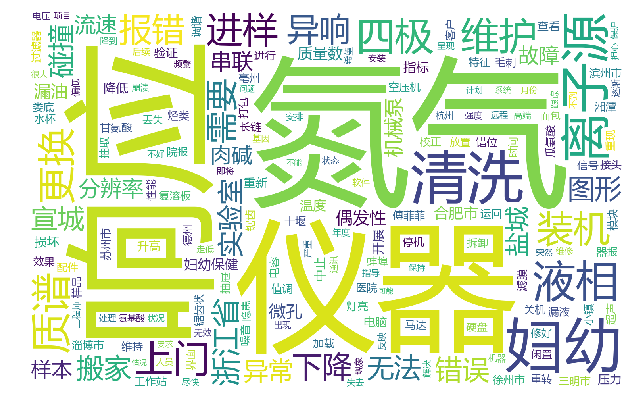

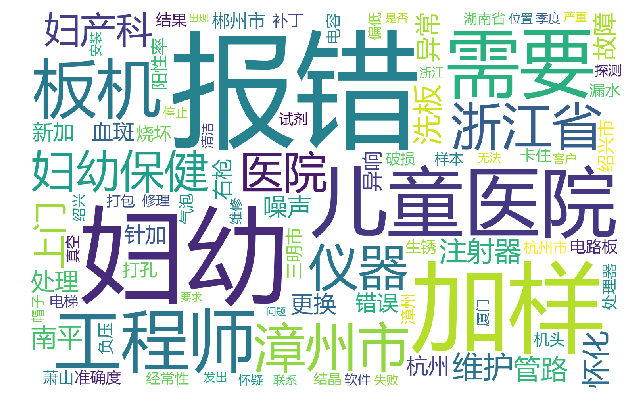

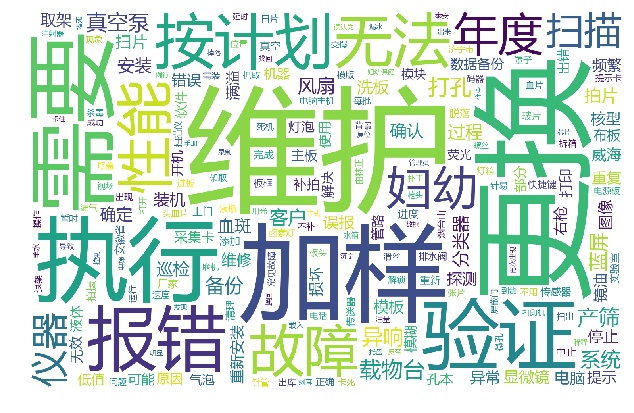

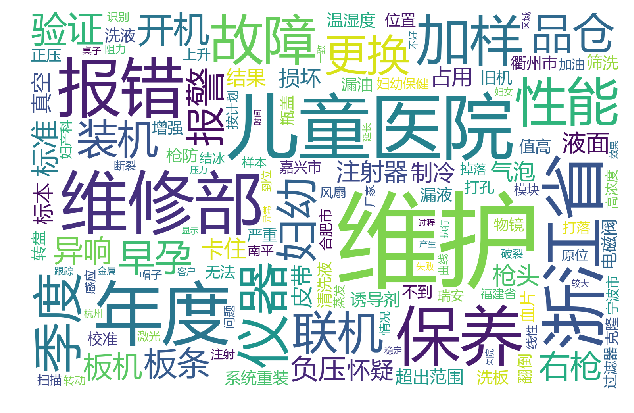

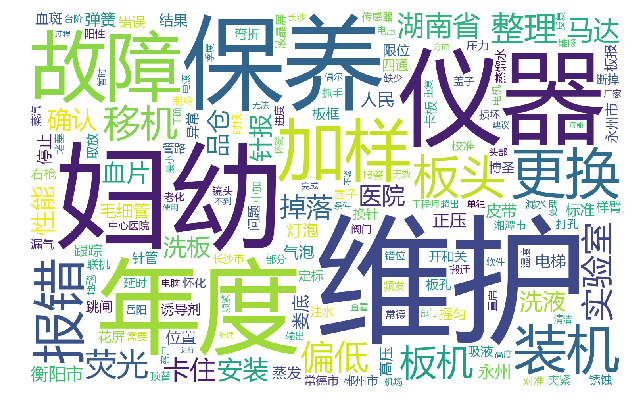

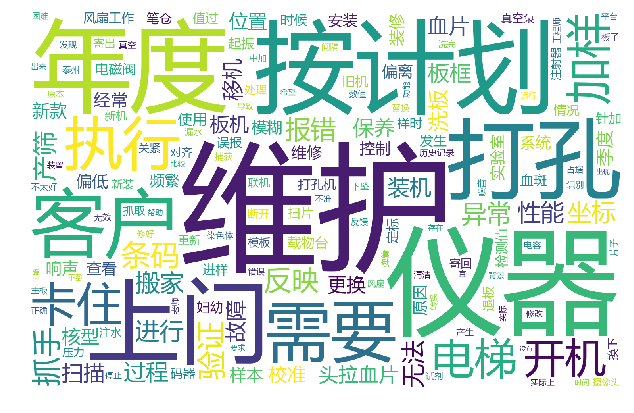

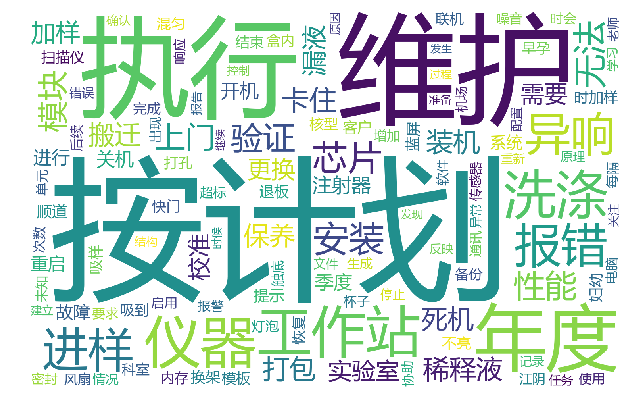

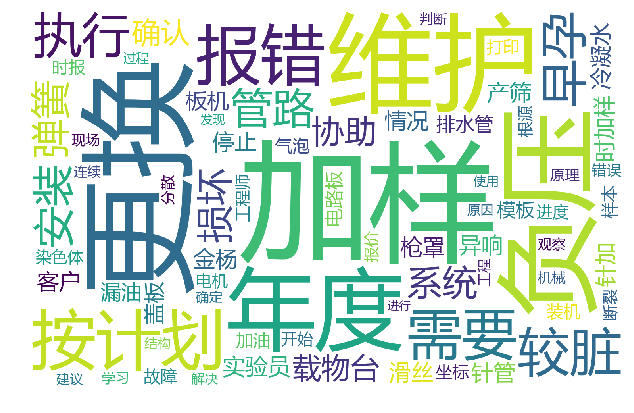

In [4]:
for en in data['分配工程师'].unique():
    print(en)
    if (data['分配工程师'] == en).sum()> 10:
        word_cloud_tfidf(data.loc[data['分配工程师'] == en, 'word_clean2'], en)
    else:
        print('数据量太少...')